# LAB 2-2 : Fading

### 1.Inclusion of libraries.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Video

%matplotlib notebook

### 2.Image source specifications.

In [3]:
img1_path = 'falcon.jpg'
img2_path = 'gripen.jpg'

### 3.Image loading and color conversions.

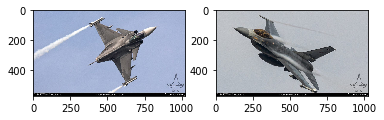

In [4]:
img1_org = cv2.imread(img1_path)
img2_org = cv2.imread(img2_path)


img1_rgb = cv2.cvtColor(img1_org,cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2_org,cv2.COLOR_BGR2RGB)


plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(img1_rgb)
plt.subplot(1,2,2)
plt.imshow(img2_rgb)

### 4.Simple weighted image additions.

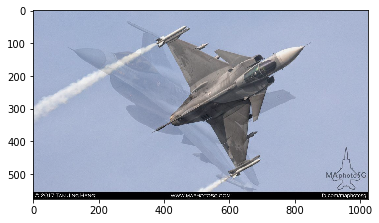

In [6]:
w1 = 0.8
w2 = 0.2

lm_result = w1 * img1_rgb + w2 * img2_rgb
lm_result = lm_result.astype(int)

plt.imshow(lm_result)

### 5.Video file creation.

In [5]:
filename = 'lab2-2.avi'
output = cv2.VideoWriter(filename,cv2.VideoWriter_fourcc('M','J','P','G'), 10, (lm_result.shape[1],lm_result.shape[0]))

w1= np.arange(1,0,-0.025)
w2 = 1-w1

for i in range(0,w1.shape[0]):
    lm_result = w1[i] * img1_org + w2[i] * img2_org
    lm_result = lm_result.astype(np.uint8)
    output.write(lm_result)

for i in range(1,w2.shape[0]):
    lm_result = w1[-i] * img1_org + w2[-i] * img2_org
    lm_result = lm_result.astype(np.uint8)
    output.write(lm_result)
    
output.release()
print("Video file creation successful!")

Video file creation successful!


### 6.Video file playback.

In [6]:
Video(filename)